In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objects as go
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Đọc dữ liệu**

In [3]:
data_equipment = pd.read_csv('/content/drive/MyDrive/Trực quan hóa dữ liệu/Thi cuối kì /russia_losses_equipment.csv')
data_equipment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       955 non-null    object 
 1   day                        955 non-null    int64  
 2   aircraft                   955 non-null    int64  
 3   helicopter                 955 non-null    int64  
 4   tank                       955 non-null    int64  
 5   APC                        955 non-null    int64  
 6   field artillery            955 non-null    int64  
 7   MRL                        955 non-null    int64  
 8   military auto              65 non-null     float64
 9   fuel tank                  65 non-null     float64
 10  drone                      955 non-null    int64  
 11  naval ship                 955 non-null    int64  
 12  anti-aircraft warfare      955 non-null    int64  
 13  special equipment          936 non-null    float64

In [4]:
data_equipment.head(10)

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles,submarines
0,2024-10-06,956,368,328,8919,17679,19092,1216,NaN,NaN,16578,28,970,3363.0,NaN,NaN,26006.0,2613.0,1.0
1,2024-10-05,955,368,328,8916,17658,19037,1216,NaN,NaN,16529,28,970,3344.0,NaN,NaN,25905.0,2613.0,1.0
2,2024-10-04,954,368,328,8908,17627,18965,1212,NaN,NaN,16494,28,965,3333.0,NaN,NaN,25820.0,2613.0,1.0
3,2024-10-03,953,368,328,8893,17596,18906,1204,NaN,NaN,16393,28,964,3330.0,NaN,NaN,25750.0,2613.0,1.0
4,2024-10-02,952,369,328,8887,17579,18869,1204,NaN,NaN,16348,28,963,3318.0,NaN,NaN,25692.0,2613.0,1.0
5,2024-10-01,951,369,328,8883,17547,18855,1204,NaN,NaN,16322,28,963,3314.0,NaN,NaN,25621.0,2613.0,1.0
6,2024-09-30,950,369,328,8874,17503,18822,1204,NaN,NaN,16224,28,963,3313.0,NaN,NaN,25548.0,2610.0,1.0
7,2024-09-29,949,369,328,8869,17476,18795,1204,NaN,NaN,16186,28,962,3297.0,NaN,NaN,25495.0,2610.0,1.0
8,2024-09-28,948,369,328,8860,17438,18733,1203,NaN,NaN,16093,28,961,3291.0,NaN,NaN,25411.0,2610.0,1.0
9,2024-09-27,947,369,328,8846,17396,18678,1199,NaN,NaN,16031,28,961,3192.0,NaN,NaN,25411.0,2608.0,1.0


In [5]:
data_personnel = pd.read_csv('/content/drive/MyDrive/Trực quan hóa dữ liệu/Thi cuối kì /russia_losses_personnel.csv')
data_personnel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        962 non-null    object 
 1   day         962 non-null    int64  
 2   personnel   962 non-null    int64  
 3   personnel*  962 non-null    object 
 4   POW         62 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 37.7+ KB


In [6]:
data_personnel.head()

,date,day,personnel,personnel*,POW
0,2024-10-13,963,668930,about,NaN
1,2024-10-12,962,667630,about,NaN
2,2024-10-11,961,666340,about,NaN
3,2024-10-10,960,665200,about,NaN
4,2024-10-09,959,664120,about,NaN


# **Xử lí dữ liệu**

In [7]:
data_equipment.describe()

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles,submarines
count,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,65.000000,65.000000,955.000000,955.000000,955.000000,936.000000,36.000000,890.000000,890.000000,389.0
mean,479.000000,292.092147,274.233508,4388.223037,8598.114136,5956.302618,650.298429,1047.507692,69.323077,4780.215707,19.102618,432.559162,926.585470,3.944444,9479.943820,1258.816854,1.0
std,275.829053,66.797606,66.253080,2412.656940,4453.294410,5354.458254,343.997102,466.162060,7.545917,4335.769863,6.010991,287.150479,934.674491,0.333333,6469.951284,781.161429,0.0
min,2.000000,10.000000,7.000000,80.000000,516.000000,49.000000,4.000000,100.000000,60.000000,0.000000,2.000000,0.000000,10.000000,2.000000,1796.000000,84.000000,1.0
25%,240.500000,269.500000,243.000000,2576.000000,5262.000000,1650.500000,372.500000,600.000000,60.000000,1333.000000,16.000000,189.000000,155.000000,4.000000,4532.000000,592.000000,1.0
50%,479.000000,314.000000,302.000000,3977.000000,7706.000000,3834.000000,609.000000,1178.000000,73.000000,3364.000000,18.000000,364.000000,560.000000,4.000000,7119.500000,1286.000000,1.0
75%,717.500000,332.000000,325.000000,6400.000000,11949.000000,9467.000000,981.000000,1437.000000,76.000000,7246.000000,24.000000,666.000000,1525.000000,4.000000,13058.000000,1911.500000,1.0
max,956.000000,369.000000,328.000000,8919.000000,17679.000000,19092.000000,1216.000000,1701.000000,76.000000,16578.000000,28.000000,970.000000,3363.000000,4.000000,26006.000000,2613.000000,1.0


In [8]:
data_personnel.isnull().sum()

,0
date,0
day,0
personnel,0
personnel*,0
POW,900


In [9]:
data_personnel.drop('POW',axis=1,inplace=True)
data_personnel.describe()

,day,personnel
count,962.00000,962.000000
mean,482.50000,251879.069647
std,277.84978,192688.100207
min,2.00000,2800.000000
25%,242.25000,67587.500000
50%,482.50000,221730.000000
75%,722.75000,399997.500000
max,963.00000,668930.000000


# **Các biểu đồ về tổn thất của Nga**

**Tổn thất về thiết bị hàng không**

In [ ]:
fig=px.line(data_equipment,x='date',y=['drone','aircraft','helicopter'],template='ggplot2',title='<b>Tổn thất thiết bị hàng không của Nga')
fig.update_layout(width=900, height=500)
fig.show()
names=['aircraft','helicopter','drone']
values=[data_equipment['aircraft'].max(),data_equipment['helicopter'].max(),data_equipment['drone'].max()]
fig=px.pie(names=names,values=values,hole=.7,template='ggplot2')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1),width=700, height=500)

**Tổn thất về thiết bị quân sự hạng nặng của Nga**

In [ ]:
fig=px.line(data_equipment,x='date',y=['vehicles and fuel tanks','tank','fuel tank'],template='seaborn',title='<b>Tổn thất thiết bị quân sự hạng nặng của Nga')
fig.update_layout(width=900, height=500)
fig.show()
names=['tank','fuel tank','vehicles and fuel tanks']
values=[data_equipment['tank'].max(),data_equipment['fuel tank'].max(),data_equipment['vehicles and fuel tanks'].max()]
fig=px.pie(names=names,values=values,hole=.7,template='seaborn')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=2),width=700, height=500)

**Tổn thất về vũ khí quân sự chuyên dụng của Nga**

In [ ]:
fig = px.line(data_equipment, x='date', y=['APC', 'military auto', 'field artillery', 'MRL', 'cruise missiles'],
              template='ggplot2', title='<b>Tổn thất về vũ khí quân sự chuyên dụng của Nga')
fig.update_layout(width=900, height=500)
fig.show()

names = ['APC', 'MRL', 'military auto', 'cruise missiles', 'field artillery']
values = [data_equipment['APC'].max(), data_equipment['MRL'].max(), data_equipment['military auto'].max(),
          data_equipment['cruise missiles'].max(), data_equipment['field artillery'].max()]
fig = px.pie(names=names, values=values, hole=.7, template='ggplot2', title = '<b> Tổn thất về vũ khí quân sự chuyên dụng của Nga')
fig.update_layout(title_x=0.5, legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
                  width=700, height=500)
fig.show()


**Số lượng thiết bị tổn thất của Nga 100 ngày đầu tiên và sau 100 ngày**

In [ ]:
device_columns = [
    'aircraft', 'helicopter', 'tank', 'APC', 'field artillery',
    'MRL', 'military auto', 'fuel tank', 'drone', 'naval ship',
    'anti-aircraft warfare', 'special equipment', 'mobile SRBM system',
    'vehicles and fuel tanks', 'cruise missiles', 'submarines'
]


bar1_main = data_equipment[device_columns].iloc[:100].sum()
bar2_main = data_equipment[device_columns].iloc[100:].sum()

needed_list = device_columns

fig = go.Figure()
fig.add_trace(go.Bar(
    x=needed_list,
    y=bar1_main,
    name='100 ngày đầu tiên',
    marker_color='blue'
))

fig.add_trace(go.Bar(
    x=needed_list,
    y=bar2_main,
    name='Sau 100 ngày',
    marker_color='gray'
))

fig.update_layout(
    title="<b>Số lượng thiết bị tổn thất của Nga trong 100 ngày đầu tiên và sau 100 ngày</b>",
    xaxis_title="Các thiết bị",
    yaxis_title="Số lượng thiết bị",
    barmode='group',
    xaxis_tickangle=-45,
    width=1000,
    height=600,
    legend=dict(
        orientation="h",
        yanchor="top",
        y=1.02,
        xanchor="right",
        x=1
    )
)
fig.show()


# **Tổng số người bị thương vong từ 2022 cho đến nay**

In [ ]:
import plotly.express as px

fig = px.line(data_personnel, x='date', y='personnel', markers=True,
              title='<b>Tổn thất nhân lực của Nga từ 2022 cho đến nay',
              color_discrete_sequence=['blue'])

fig.update_traces(marker=dict(size=4))
fig.update_layout(font_color='black',
                  title_x=0.5,
                  plot_bgcolor='#f0f0f0',
                  paper_bgcolor='#f0f0f0',
                  width =900 , height = 500)

fig.show()


# **Các thành phố ghi nhận nhiều tổn thất thiết bị nhất**

In [ ]:
data_equipment['total_losses'] = data_equipment[['tank', 'aircraft', 'helicopter', 'APC', 'drone',
                                                  'naval ship', 'special equipment',
                                                  'vehicles and fuel tanks', 'cruise missiles']].sum(axis=1)

city_total_losses = (data_equipment.groupby('greatest losses direction', as_index=False)
                     ['total_losses'].sum()
                     .sort_values(by='total_losses', ascending=False)
                     .reset_index(drop=True)
                     .head(15))

fig = px.bar(
    city_total_losses,
    x='greatest losses direction',
    y='total_losses',
    color='greatest losses direction',
    text='total_losses',
    template='seaborn',
    labels={'total_losses': 'Số lượng thiết bị tổn thất', 'greatest losses direction': 'Thành phố'},
    title='<b>Các thành phố ghi nhận nhiều tổn thất thiết bị nhất'
)

fig.update_layout(title_x=0.5,width = 1300 , height = 500)
fig.show()


# **Tỉ lệ tổn thất các loại thiết bị quân sự**

In [12]:
values = data_equipment[['aircraft', 'helicopter', 'tank', 'APC', 'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone',
                   'naval ship', 'anti-aircraft warfare', 'special equipment','vehicles and fuel tanks']].sum()
labels = ('aircraft', 'helicopter', 'tank', 'APC', 'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone',
                   'naval ship', 'anti-aircraft warfare', 'special equipment','vehicles and fuel tanks')

fig = {
  "data": [
    {
      "values": values,
      "labels": labels,
      "domain": {"x": [0,0]},
      "name": "Ratio of Equipment Losses",
      "hoverinfo": "label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title": "Tỷ lệ tổn thất của các loại thiết bị quân sự",
        "annotations": [
            { "font": { "size": 15},
              "showarrow": False,
              "text": "",
                "x": 0.2,
                "y": 0.2
            },
        ]
    }
}
iplot(fig)

# **Mối quan hệ tương quan tổn thất giữa các thiết bị quân sự**

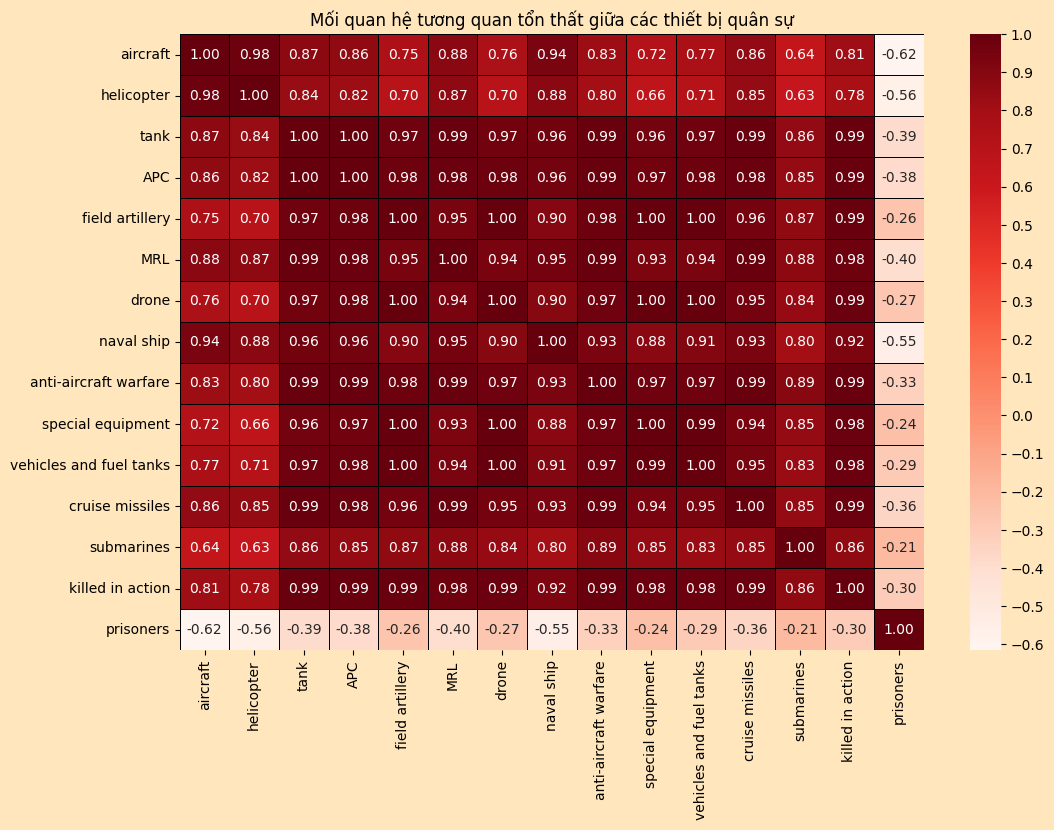

In [10]:
import pandas as pd

df1 = pd.read_csv('/content/drive/MyDrive/Trực quan hóa dữ liệu/Thi cuối kì /russia_losses_equipment.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Trực quan hóa dữ liệu/Thi cuối kì /russia_losses_personnel.csv')

df1['fuel tank'] = df1['fuel tank'].fillna(0)
df1['military auto'] = df1['military auto'].fillna(0)
df1['mobile SRBM system'] = df1['mobile SRBM system'].fillna(0)

df1['vehicles and fuel tanks'] = df1['vehicles and fuel tanks'].fillna(0) + df1['fuel tank'] + df1['military auto']
df1['cruise missiles'] = df1['cruise missiles'].fillna(0) + df1['mobile SRBM system']

df1.drop(columns=['fuel tank', 'military auto', 'mobile SRBM system'], inplace=True)

df1.fillna(0, inplace=True)
df2.fillna(0, inplace=True)

df2.drop(columns=['personnel*'], inplace=True)
df2.rename(columns={'personnel': 'killed in action', 'POW': 'prisoners'}, inplace=True)

df_combo = pd.merge(df1, df2, on=['date', 'day'], how='outer')

df1_filtered = df_combo.drop(columns=['date', 'day', 'greatest losses direction'])
nums = df1_filtered.apply(pd.to_numeric, errors='coerce')

correlation_matrix = nums.corr()

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))

fig.patch.set_facecolor((255/255, 230/255, 188/255, 1))
ax.set_facecolor((255/255, 230/255, 188/255, 1))

heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='Reds',
    fmt=".2f",
    linewidths=0.7,
    linecolor='black',
    ax=ax,
    cbar_kws={'ticks': [-0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
)

plt.title('Mối quan hệ tương quan tổn thất giữa các thiết bị quân sự')
plt.show()


# **Tổng tổn thất các thiết bị quân sự của Nga theo ngày**

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

df = pd.read_csv('/content/drive/MyDrive/Trực quan hóa dữ liệu/Thi cuối kì /russia_losses_equipment.csv')

equipment_columns = [
    'aircraft', 'helicopter', 'tank', 'APC', 'field artillery', 'MRL',
    'military auto', 'fuel tank', 'drone', 'naval ship', 'anti-aircraft warfare',
    'special equipment', 'mobile SRBM system', 'vehicles and fuel tanks', 'cruise missiles',
    'submarines'
]

df[equipment_columns] = df[equipment_columns].fillna(0)

df['total_daily_losses'] = df[equipment_columns].sum(axis=1)

max_loss_index = df['total_daily_losses'].idxmax()
max_loss_date = df['date'][max_loss_index]
max_loss_value = df['total_daily_losses'][max_loss_index]

fig = go.Figure()

fig.add_trace(go.Scatter(x=df['date'], y=df['total_daily_losses'], mode='lines', name='Tổng tổn thất'))

fig.add_trace(go.Scatter(x=[max_loss_date], y=[max_loss_value], mode='markers',
                         marker=dict(color='red', size=10), name='Điểm cao nhất'))

fig.update_layout(
    title='Tổng tổn thất thiết bị quân sự của Nga theo ngày',
    xaxis_title='Ngày',
    yaxis_title='Tổng tổn thất thiết bị',
    width=900,
    height=600
)


fig.show()
